# Data Science Template Notebook

# Imports

In [1]:
library(tidyverse)
library(GGally)
library(rworldmap)
library(ggrepel)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: sp

### Welcome to rworldmap ###

For a short introduction type : 	 vignette('rworldmap')



# Setup

In [2]:
# Plot size
dpi <- 150
width <- 1000 / dpi
height <- 1000 / dpi

options(repr.plot.width=width, repr.plot.height=height)

# Theme for plots
theme_custom <- function(){
    theme_minimal() %+replace%
    theme(aspect.ratio = height/width,
    plot.title = element_text(size = 24),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14))
}

# Goal

Objective of the project.

# Data Sources

The data comes from:
[Global Terrorism Database](http://start.umd.edu/gtd/)

And along with it comes detailed documentation:
[Global Terrorism Database Codebook](http://start.umd.edu/gtd/downloads/Codebook.pdf)

The set itself was downloaded from:
[Global Terrorism Dataset on kaggle](https://www.kaggle.com/START-UMD/gtd)

# Data Loading

In [3]:
df <- read.csv("./data/globalterrorismdb_0718dist.csv")

In [4]:
dim(df)

[1] 181691    135

# Data Cleaning

## Preview columns

In [5]:
colnames(df)

[1] "eventid"            "iyear"              "imonth"            
  [4] "iday"               "approxdate"         "extended"          
  [7] "resolution"         "country"            "country_txt"       
 [10] "region"             "region_txt"         "provstate"         
 [13] "city"               "latitude"           "longitude"         
 [16] "specificity"        "vicinity"           "location"          
 [19] "summary"            "crit1"              "crit2"             
 [22] "crit3"              "doubtterr"          "alternative"       
 [25] "alternative_txt"    "multiple"           "success"           
 [28] "suicide"            "attacktype1"        "attacktype1_txt"   
 [31] "attacktype2"        "attacktype2_txt"    "attacktype3"       
 [34] "attacktype3_txt"    "targtype1"          "targtype1_txt"     
 [37] "targsubtype1"       "targsubtype1_txt"   "corp1"             
 [40] "target1"            "natlty1"            "natlty1_txt"       
 [43] "targtype2"          "targtype2_txt"      "targsubtype2"      
 [46] "targsubtype2_txt"   "corp2"              "target2"           
 [49] "natlty2"            "natlty2_txt"        "targtype3"         
 [52] "targtype3_txt"      "targsubtype3"       "targsubtype3_txt"  
 [55] "corp3"              "target3"            "natlty3"           
 [58] "natlty3_txt"        "gname"              "gsubname"          
 [61] "gname2"             "gsubname2"          "gname3"            
 [64] "gsubname3"          "motive"             "guncertain1"       
 [67] "guncertain2"        "guncertain3"        "individual"        
 [70] "nperps"             "nperpcap"           "claimed"           
 [73] "claimmode"          "claimmode_txt"      "claim2"            
 [76] "claimmode2"         "claimmode2_txt"     "claim3"            
 [79] "claimmode3"         "claimmode3_txt"     "compclaim"         
 [82] "weaptype1"          "weaptype1_txt"      "weapsubtype1"      
 [85] "weapsubtype1_txt"   "weaptype2"          "weaptype2_txt"     
 [88] "weapsubtype2"       "weapsubtype2_txt"   "weaptype3"         
 [91] "weaptype3_txt"      "weapsubtype3"       "weapsubtype3_txt"  
 [94] "weaptype4"          "weaptype4_txt"      "weapsubtype4"      
 [97] "weapsubtype4_txt"   "weapdetail"         "nkill"             
[100] "nkillus"            "nkillter"           "nwound"            
[103] "nwoundus"           "nwoundte"           "property"          
[106] "propextent"         "propextent_txt"     "propvalue"         
[109] "propcomment"        "ishostkid"          "nhostkid"          
[112] "nhostkidus"         "nhours"             "ndays"             
[115] "divert"             "kidhijcountry"      "ransom"            
[118] "ransomamt"          "ransomamtus"        "ransompaid"        
[121] "ransompaidus"       "ransomnote"         "hostkidoutcome"    
[124] "hostkidoutcome_txt" "nreleased"          "addnotes"          
[127] "scite1"             "scite2"             "scite3"            
[130] "dbsource"           "INT_LOG"            "INT_IDEO"          
[133] "INT_MISC"           "INT_ANY"            "related"

## Subetting

In [6]:
data <- df %>%
    dplyr::select(
        
        # Time
        iyear,           # Year
        imonth,          # Month
        iday,            # Day
             
        # Geospatial
        latitude,        # Geo coordinate
        longitude,       # Geo coordinate
             
        # Numerical
        nperps,          # Number of perpetrators
        nkill,           # Death toll
        nwound,          # No of casualties
        nkillter,        # Death toll - terrorist only
        propextent,      # Amount of damage done                  
        ransomamt,       # Any ransom demanded ?         
             
        # Binary
        doubtterr,       # Was an act of terror ?
        vicinity,        # Did event occur in city ?
        ishostkid,       # Hostages
        extended,        # Duration above 24hrs ?
        
        # Categorical
        city,            # City        
        country,         # Country id
        region,          # Region id        
        country_txt,     # Desc country
        region_txt,      # Desc region  
        attacktype1_txt, # Desc attack type
        weaptype1_txt,   # Desc weapon type
        targtype1_txt,   # Desc target type

            
        # Text
#         summary,         # Motive text variable
        gname            # Name of organization
    )

## Renaming

In [7]:
data <- data %>%
    dplyr::rename(year=iyear,
                  month=imonth,
                  day=iday,
                  damage=propextent,
                  lat=latitude,
                  long=longitude) %>%
    dplyr::mutate(country=country_txt,
                  region=region_txt,
                  attack=attacktype1_txt,
                  weapon=weaptype1_txt,
                  target=targtype1_txt) %>%
    dplyr::select(-country_txt, 
                  -region_txt, 
                  -attacktype1_txt, 
                  -weaptype1_txt, 
                  -targtype1_txt)

In [8]:
data <- data %>%
    dplyr::mutate(attack = as.character(attack)) %>%
    dplyr::mutate(attack = ifelse(attack == 'Facility/Infrastructure Attack', 'Infrastructure Attack', attack),
                  attack = ifelse(attack == 'Bombing/Explosion', 'Explosion', attack),
                  attack = ifelse(attack == 'Hostage Taking (Barricade Incident)', 'Hostage (Barricade)', attack),
                  attack = ifelse(attack == 'Hostage Taking (Kidnapping)', 'Hostage (Kidnapping)', attack)) %>%
    dplyr::mutate(attack = as.factor(attack))

In [9]:
data <- data %>%
    dplyr::mutate(weapon = as.character(weapon)) %>%
    dplyr::mutate(weapon = ifelse(weapon == 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle', weapon)) %>%
    dplyr::mutate(weapon = as.factor(weapon))

In [10]:
data <- data %>%
    dplyr::mutate(target = as.character(target)) %>%
    dplyr::mutate(target = ifelse(target == 'Government (General)', 'Government', target)) %>%
    dplyr::mutate(target = ifelse(target == 'Private Citizens & Property', 'Private', target)) %>%
    dplyr::mutate(target = as.factor(target))

In [11]:
data <- data %>%
    dplyr::mutate(country = as.character(country)) %>%
    dplyr::mutate(country = ifelse(country == 'Democratic Republic of the Congo', 'Congo', country)) %>%
    dplyr::mutate(country = as.factor(country))

In [12]:
data <- data %>%
    dplyr::mutate(gname = as.character(gname)) %>%
    dplyr::mutate(gname = ifelse(gname == 'Islamic State of Iraq and the Levant (ISIL)', 'ISIL', gname),
                  gname = ifelse(gname == 'Al-Qaida in Iraq', 'Al-Qaida', gname),
                  gname = ifelse(gname == 'Al-Nusrah Front', 'Al-Nusrah', gname),                                    
                  gname = ifelse(gname == 'Fulani extremists', 'Fulani', gname),                  
                  gname = ifelse(gname == 'Houthi extremists (Ansar Allah)', 'Ansar Allah', gname),                                    
                  gname = ifelse(gname == 'Communist Party of India - Maoist (CPI-Maoist)', 'CPI - Maoist', gname),                                    
                  gname = ifelse(gname == 'Tehrik-i-Taliban Pakistan (TTP)', 'TTP', gname)) %>%
    dplyr::mutate(gname = as.factor(gname))

In [13]:
dim(data)

[1] 181691     22

## Filtering

In [14]:
data <- data %>%
    dplyr::filter(2007 <= year & 
                  year <= 2017 &
                  doubtterr == 0)

In [15]:
dim(data)

[1] 83606    22

## Missing values

In [16]:
data <- data %>%
    dplyr::mutate(doubtterr = ifelse(doubtterr < 0, 0, doubtterr),
                  vicinity = ifelse(vicinity < 0, 0, vicinity), 
                  extended = ifelse(extended < 0, 0, extended),
                  ishostkid = ifelse(ishostkid < 0, 0, ishostkid))

In [17]:
data <- data %>%
    dplyr::mutate(nperps = ifelse(nperps <= 0, 1, nperps),
                  nkill = ifelse(nkill < 0, 0, nkill),
                  nwound = ifelse(nwound < 0, 0, nkill),
                  nkillter = ifelse(nkillter < 0, 0, nkillter),
                  ransomamt = ifelse(ransomamt < 0, 0, ransomamt),
                  damage = ifelse(damage < 0, 0, damage))

In [18]:
data <- data %>% 
    tidyr::replace_na(list('doubtterr' = 0,
                           'vicinity' = 0,
                           'extended' = 0,
                           'ishostkid' = 0,
                           'nperps' = 1, 
                           'nkill' = 0, 
                           'nwound' = 0, 
                           'nkillter' = 0, 
                           'ransomamt' = 0, 
                           'damage' = 0))

## Types & formats

In [19]:
data <- data %>%
    dplyr::mutate(nwound = as.integer(nwound),
                  doubtterr = as.logical(doubtterr), 
                  vicinity = as.logical(vicinity),
                  extended = as.logical(extended),
                  ishostkid = as.logical(ishostkid))

In [20]:
glimpse(data)

Rows: 83,606
Columns: 22
$ year      <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,…
$ month     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ day       <int> 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7,…
$ lat       <dbl> 31.356581, 13.727896, 34.467964, 29.034412, 34.346722, 4.13…
$ long      <dbl> 34.32656, 100.52412, 70.49149, 69.15866, 62.19732, 32.29349…
$ nperps    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ nkill     <dbl> 0, 3, 0, 0, 2, 13, 0, 2, 14, 0, 13, 0, 5, 48, 3, 1, 1, 12, …
$ nwound    <int> 0, 3, 0, 0, 2, 13, 0, 2, 0, 0, 13, 0, 5, 48, 3, 1, 1, 12, 1…
$ nkillter  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0…
$ damage    <dbl> 0, 4, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0,…
$ ransomamt <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ doubtterr <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ vicinity  <lgl> FALSE, FA

## Derived measures

In [21]:
data <- data %>%
    dplyr::mutate(month = ifelse(month == 0, 6, month),
                  day = ifelse(day == 0, 15, day),
                  date = lubridate::make_date(year, month, day)) %>%
    dplyr::filter(!is.na(date))

In [22]:
dim(data)

[1] 83606    23

## Encoding

In [23]:
data <- data %>%
    dplyr::mutate(damage = ifelse(damage == 0, "Unknown", damage),
                  damage = ifelse(damage == 4, "Unknown", damage),
                  damage = ifelse(damage == 3, "Low", damage),
                  damage = ifelse(damage == 2, "Medium", damage),
                  damage = ifelse(damage == 1, "High", damage),
                  damage = as.factor(damage))

# Data Exploration

## Dates & timestamps

In [24]:
min(data$date)

[1] "2007-01-01"

In [25]:
max(data$date)

[1] "2017-12-31"

## Categorical variables

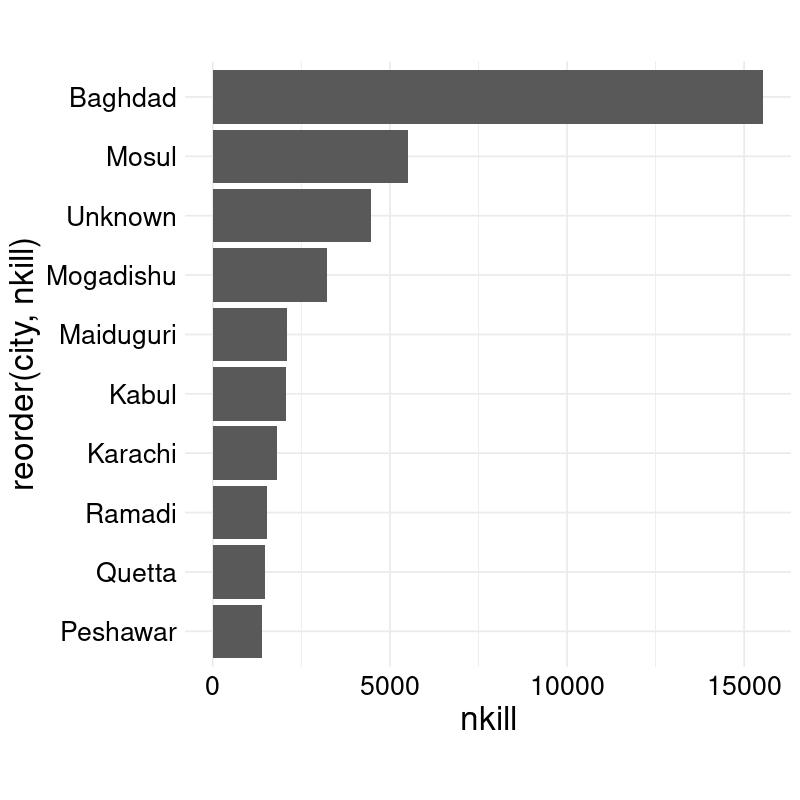

In [26]:
by_city <- data %>%
    dplyr::filter(city != '') %>%
    dplyr::group_by(city) %>%
    dplyr::summarise(nkill = sum(nkill), .groups='drop') %>%
    dplyr::arrange(-nkill) %>%
    dplyr::top_n(nkill, n=10)
  
ggplot(data=by_city, aes(x=reorder(city, nkill), y=nkill)) + 
    geom_bar(stat='identity') +
    coord_flip() +
    theme_custom() 

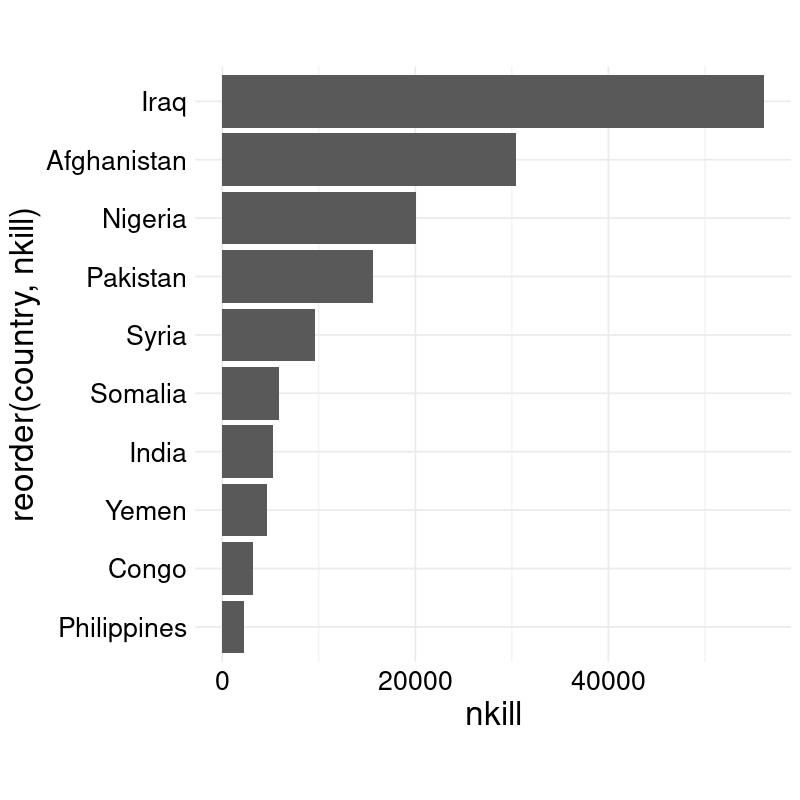

In [27]:
by_country <- data %>%
    dplyr::group_by(country) %>%
    dplyr::summarise(nkill = sum(nkill), .groups='drop') %>%
    dplyr::arrange(-nkill) %>%
    dplyr::top_n(nkill, n=10)

ggplot(data=by_country, aes(x=reorder(country, nkill), y=nkill)) + 
    geom_bar(stat='identity') +
    coord_flip() +
    theme_custom() 

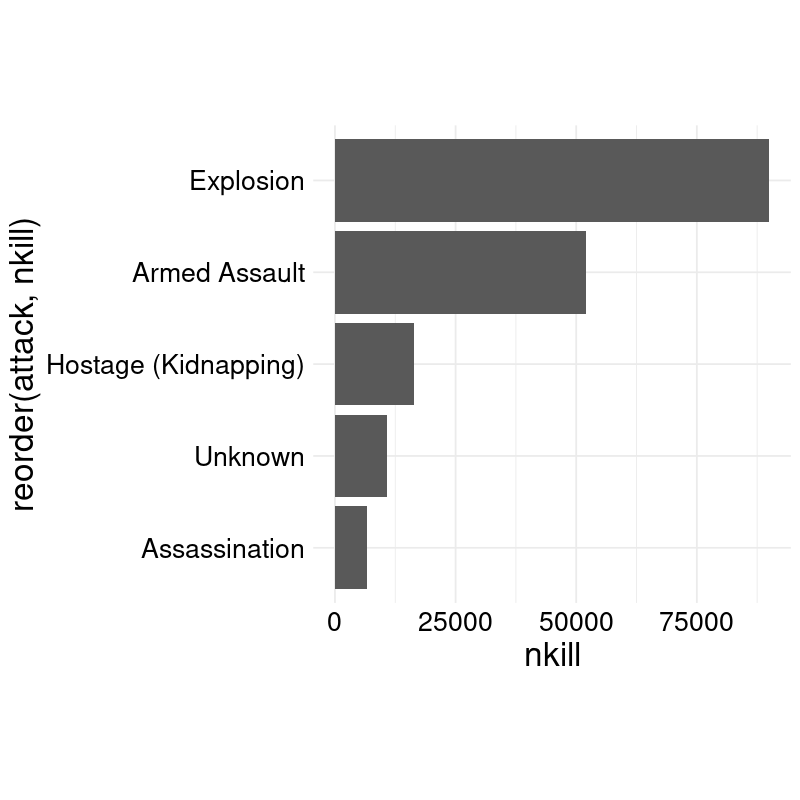

In [28]:
by_attack <- data %>%
    dplyr::group_by(attack) %>%
    dplyr::summarise(nkill = sum(nkill), .groups='drop') %>%
    dplyr::arrange(-nkill) %>%
    dplyr::top_n(nkill, n=5)
  
ggplot(data=by_attack, aes(x=reorder(attack, nkill), y=nkill)) + 
    geom_bar(stat='identity') +
    coord_flip() +
    theme_custom() 

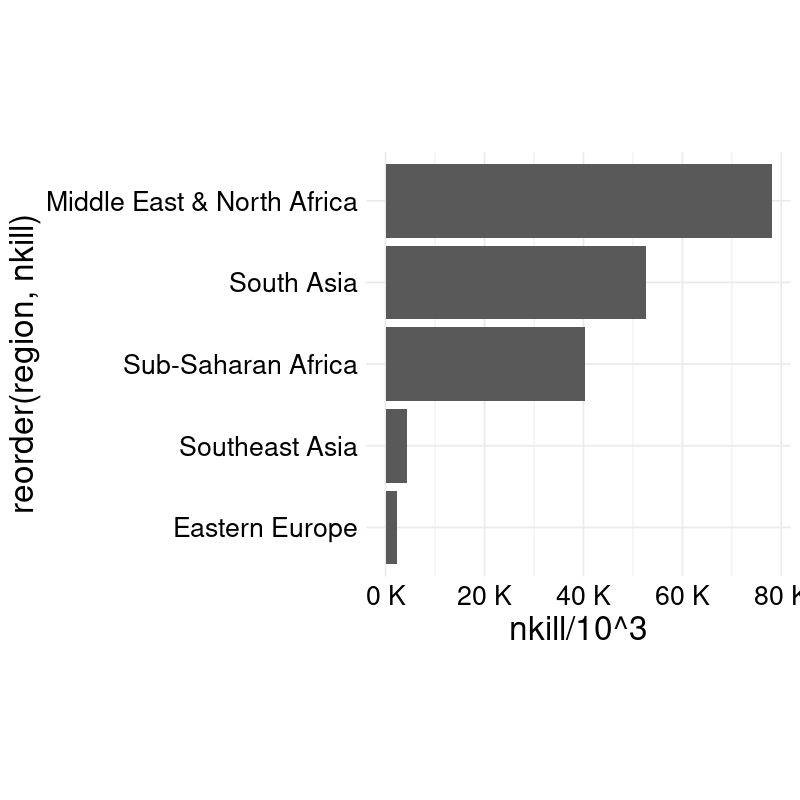

In [29]:
by_region <- data %>%
    dplyr::group_by(region) %>%
    dplyr::summarise(nkill = sum(nkill), .groups='drop') %>%
    dplyr::arrange(-nkill) %>%
    dplyr::top_n(nkill, n=5)
    
ggplot(data=by_region, aes(x=reorder(region, nkill), y=nkill / 10 ^ 3)) + 
    geom_bar(stat='identity') +
    coord_flip() +
    scale_y_continuous(labels = scales::unit_format(unit = "K")) +
    theme_custom() 

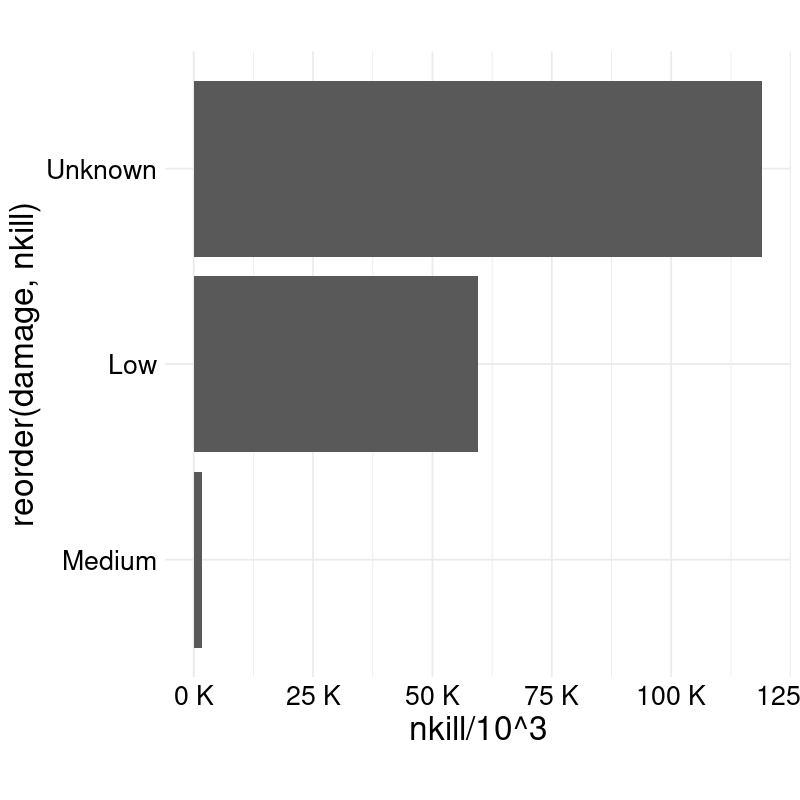

In [30]:
by_damage <- data %>%
    dplyr::group_by(damage) %>%
    dplyr::summarise(nkill = sum(nkill), .groups='drop') %>%
    dplyr::arrange(-nkill)

ggplot(data=by_damage, aes(x=reorder(damage, nkill), y=nkill / 10 ** 3)) +
    geom_bar(stat='identity') +
    scale_y_continuous(labels = scales::unit_format(unit = "K")) +
    coord_flip() +
    theme_custom() 

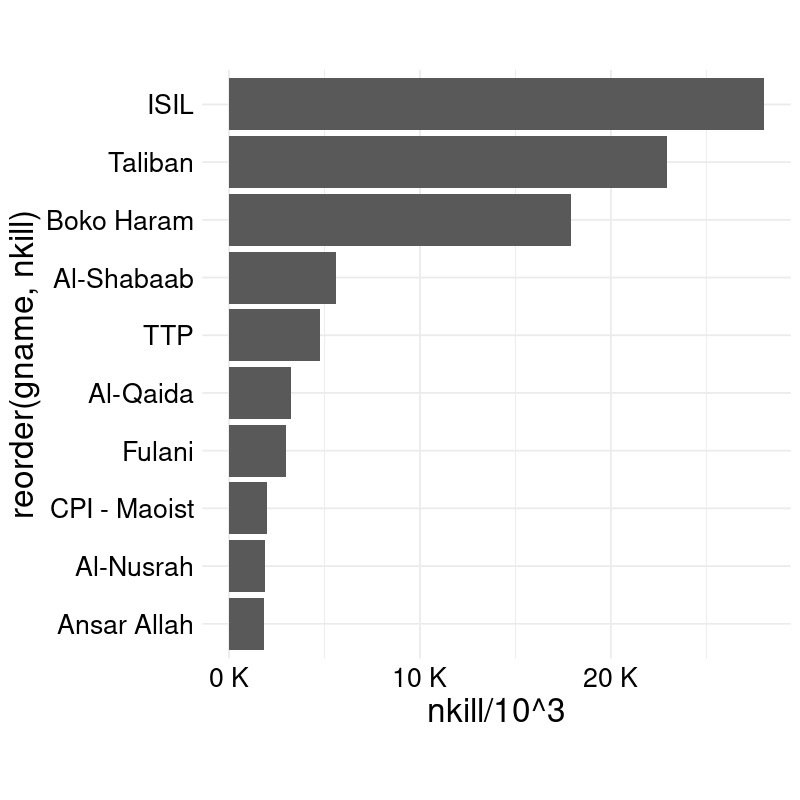

In [31]:
by_gname <- data %>%
    dplyr::select(gname, nkill) %>%
    dplyr::group_by(gname) %>%
    dplyr::summarize(nkill = sum(nkill), .groups='drop') %>%
    dplyr::filter(nkill > 0 & gname != 'Unknown') %>%
    dplyr::arrange(-nkill) %>%
    dplyr::top_n(nkill, n=10)

ggplot(data=by_gname, aes(x=reorder(gname, nkill), y=nkill / 10 ^ 3)) +
    geom_bar(stat='identity') +
    scale_y_continuous(labels = scales::unit_format(unit = "K")) +
    coord_flip() +
    theme_custom() 

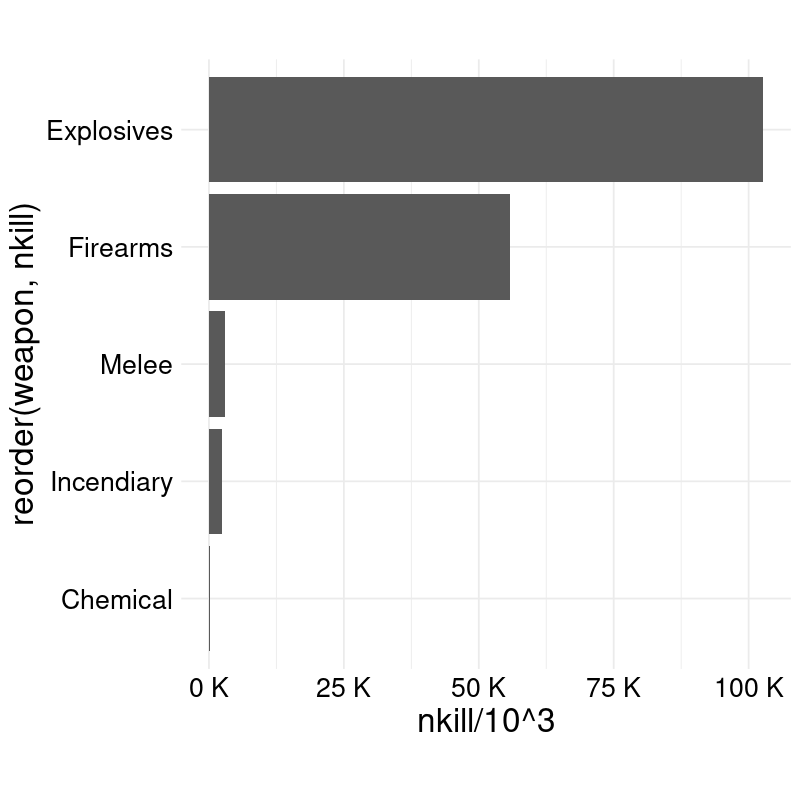

In [32]:
by_weapon <- data %>%
    dplyr::select(weapon, nkill) %>%
    dplyr::filter(weapon != 'Unknown' & weapon != 'Other') %>%
    dplyr::group_by(weapon) %>%
    dplyr::summarize(nkill = sum(nkill), .groups='drop') %>%
    dplyr::arrange(-nkill) %>%
    dplyr::top_n(nkill, n=5)

ggplot(data=by_weapon, aes(x=reorder(weapon, nkill), y=nkill / 10 ^ 3)) +
    geom_bar(stat='identity') +
    scale_y_continuous(labels = scales::unit_format(unit = "K")) +
    coord_flip() +
    theme_custom() 

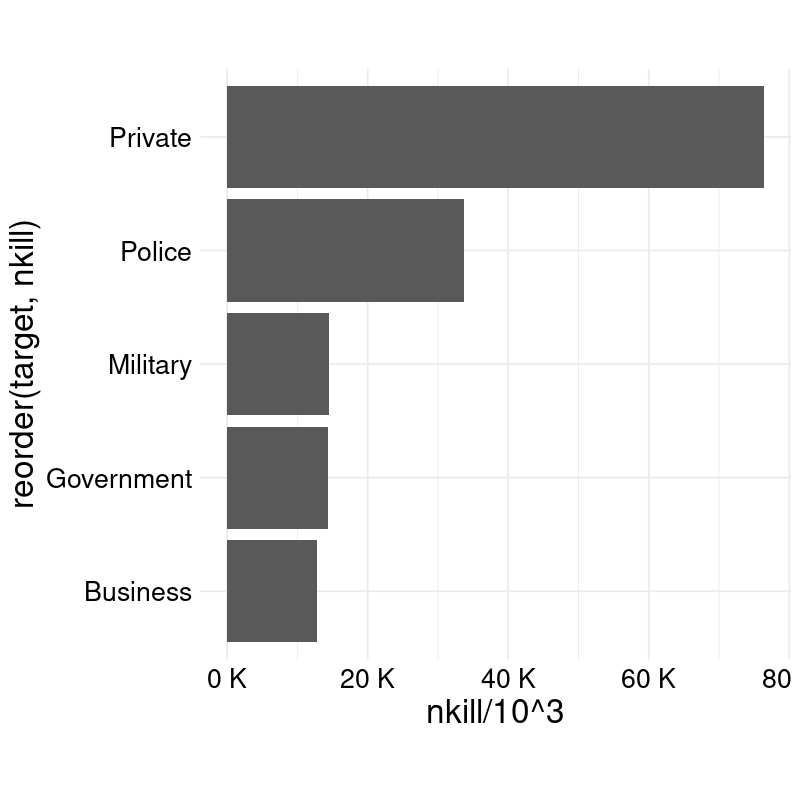

In [33]:
by_target <- data %>%
    dplyr::select(target, nkill) %>%
    dplyr::filter(target != 'Unknown') %>%
    dplyr::group_by(target) %>%
    dplyr::summarize(nkill = sum(nkill), .groups='drop') %>%
    dplyr::arrange(-nkill) %>%
    dplyr::top_n(nkill, n=5)

ggplot(data=by_target, aes(x=reorder(target, nkill), y=nkill / 10 ^ 3)) +
    geom_bar(stat='identity') +
    scale_y_continuous(labels = scales::unit_format(unit = "K")) +
    coord_flip() +
    theme_custom() 

## Numerical variables

### Descriptive statistics

In [34]:
numerical <- c("nperps",
               "nkill",
               "nwound",
               "nkillter",
               "ransomamt")

In [35]:
summary(dplyr::select_at(data, numerical))

     nperps            nkill             nwound           nkillter       
 Min.   :   1.00   Min.   :  0.000   Min.   :  0.000   Min.   :  0.0000  
 1st Qu.:   1.00   1st Qu.:  0.000   1st Qu.:  0.000   1st Qu.:  0.0000  
 Median :   1.00   Median :  0.000   Median :  0.000   Median :  0.0000  
 Mean   :   3.14   Mean   :  2.157   Mean   :  1.804   Mean   :  0.3771  
 3rd Qu.:   1.00   3rd Qu.:  2.000   3rd Qu.:  1.000   3rd Qu.:  0.0000  
 Max.   :5000.00   Max.   :953.000   Max.   :670.000   Max.   :301.0000  
   ransomamt        
 Min.   :        0  
 1st Qu.:        0  
 Median :        0  
 Mean   :    17457  
 3rd Qu.:        0  
 Max.   :200000000  

### Plots over time

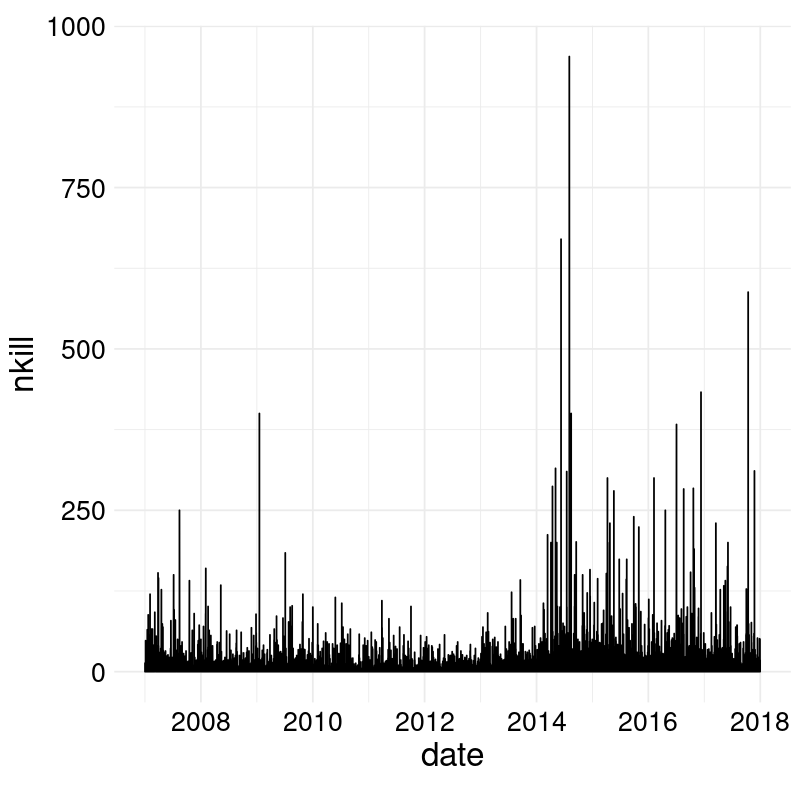

In [36]:
nkill_daily <- data %>%
    dplyr::select(date, nkill) %>% 
    tidyr::fill(nkill, 0) %>%
    dplyr::mutate(nkill = ifelse(nkill < 0, 0, nkill))

ggplot(data=nkill_daily, aes(x=date, y=nkill)) +
    geom_line() + 
    theme_custom()

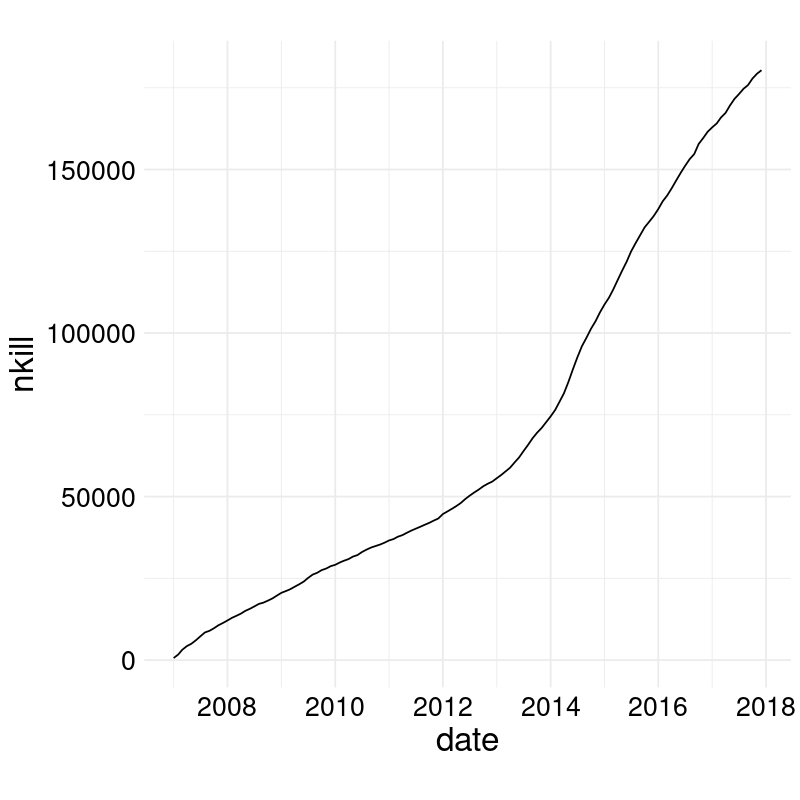

In [37]:
nkill_monthly <- data %>%
    dplyr::select(year, month, nkill) %>% 
    tidyr::fill(nkill, 0) %>%
    dplyr::mutate(nkill = ifelse(nkill < 0, 0, nkill)) %>%
    dplyr::group_by(year, month) %>%
    dplyr::summarise(nkill = sum(nkill), .groups='drop') %>%
    dplyr::mutate(date = lubridate::make_date(year, month, 1),
                  nkill = base::cumsum(nkill)) %>%
    dplyr::select(-year, -month)

ggplot(data=nkill_monthly, aes(x=date, y=nkill)) +
    geom_line() + 
    theme_custom()

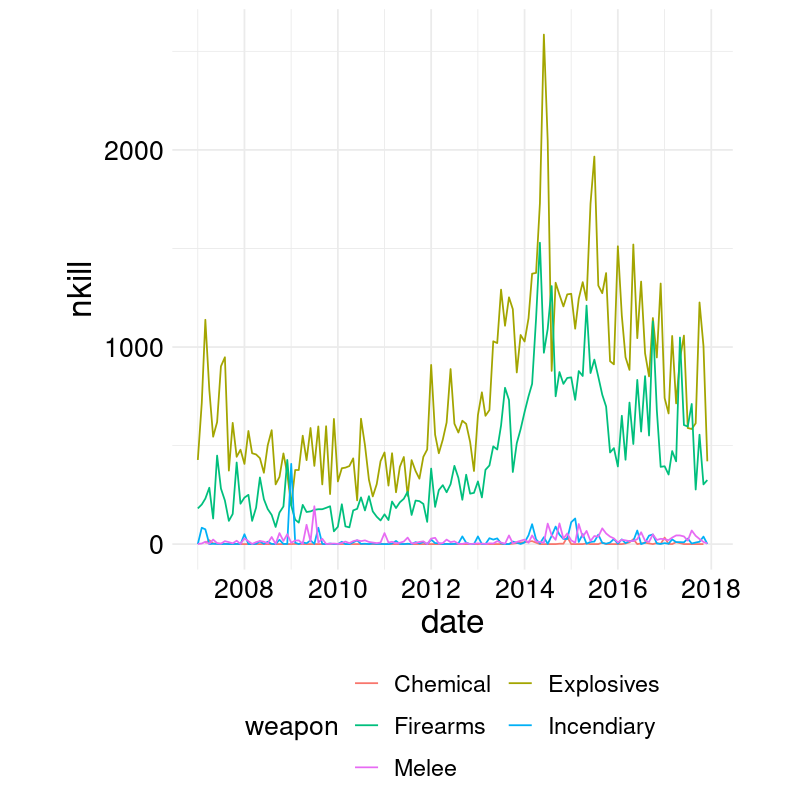

In [38]:
nkill_by_weapon_monthly <- data %>%
    dplyr::select(year, month, nkill, weapon) %>% 
    dplyr::filter(weapon %in% by_weapon$weapon) %>%
    dplyr::group_by(year, month, weapon) %>%
    dplyr::summarise(nkill = sum(nkill), .groups='drop') %>%
    dplyr::mutate(date = lubridate::make_date(year, month, 1)) %>%
    dplyr::select(-year, -month)

ggplot(nkill_by_weapon_monthly, aes(x=date, y=nkill, color=weapon)) +
    geom_line() +
    guides(color=guide_legend(nrow=3,byrow=TRUE)) +
    theme_custom() +
    theme_custom() + 
    theme(legend.position="bottom")

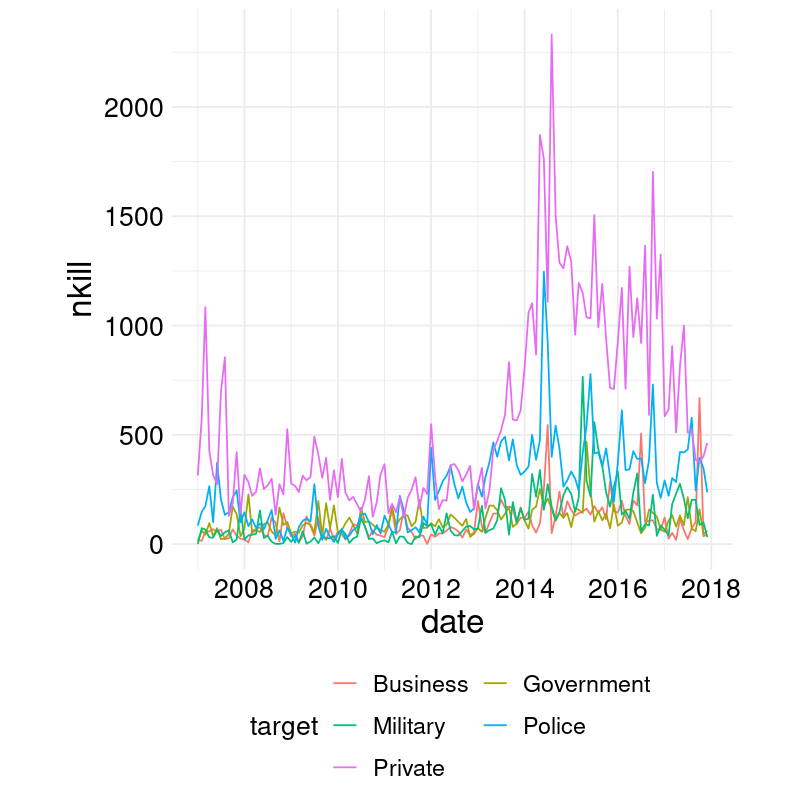

In [39]:
nkill_by_target_monthly <- data %>%
    dplyr::select(year, month, nkill, target) %>% 
    dplyr::filter(target %in% by_target$target) %>%
    dplyr::group_by(year, month, target) %>%
    dplyr::summarise(nkill = sum(nkill), .groups='drop') %>%
    dplyr::mutate(date = lubridate::make_date(year, month, 1)) %>%
    dplyr::select(-year, -month)

ggplot(nkill_by_target_monthly, aes(x=date, y=nkill, color=target)) +
    geom_line() +
    guides(color=guide_legend(nrow=3,byrow=TRUE)) +
    theme_custom() +
    theme(legend.position="bottom")

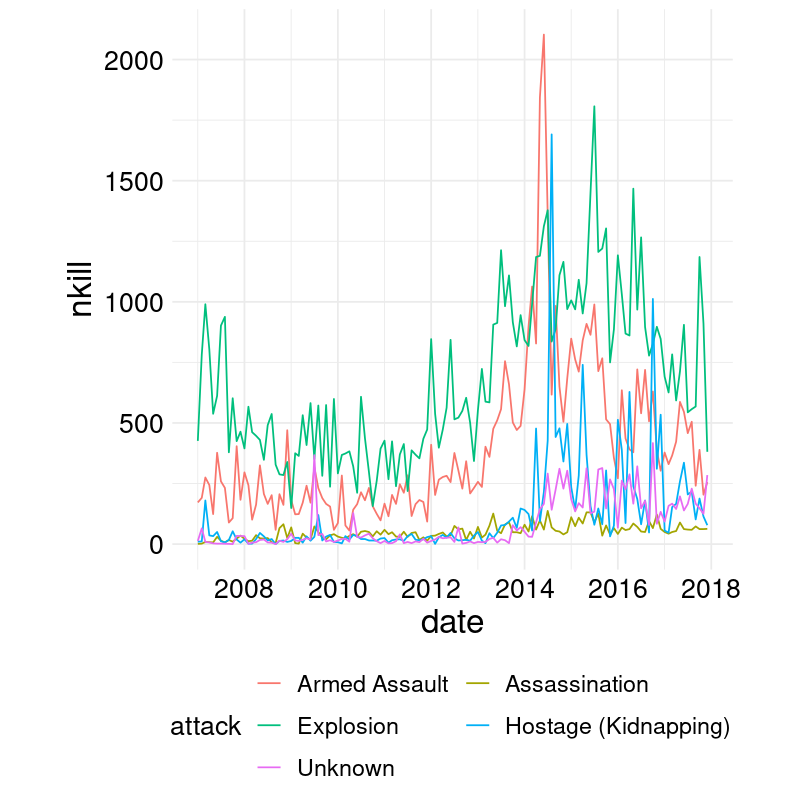

In [40]:
nkill_by_attack_monthly <- data %>%
    dplyr::select(year, month, nkill, attack) %>% 
    dplyr::filter(attack %in% by_attack$attack) %>%
    dplyr::group_by(year, month, attack) %>%
    dplyr::summarise(nkill = sum(nkill), .groups='drop') %>%
    dplyr::mutate(date = lubridate::make_date(year, month, 1)) %>%
    dplyr::select(-year, -month)

ggplot(nkill_by_attack_monthly, aes(x=date, y=nkill, color=attack)) +
    geom_line() +
    guides(color=guide_legend(nrow=3,byrow=TRUE)) +
    theme_custom() +
    theme_custom() + 
    theme(legend.position="bottom")

### Histograms

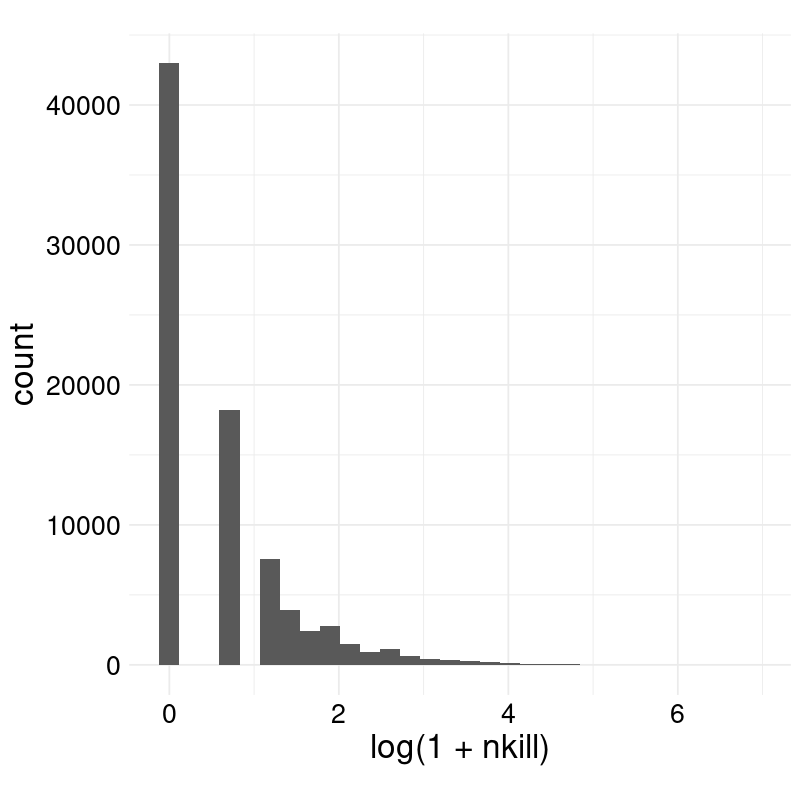

In [41]:
ggplot(data=data, aes(x=log(1 + nkill))) +
    geom_histogram(bins=30) +
    theme_custom()

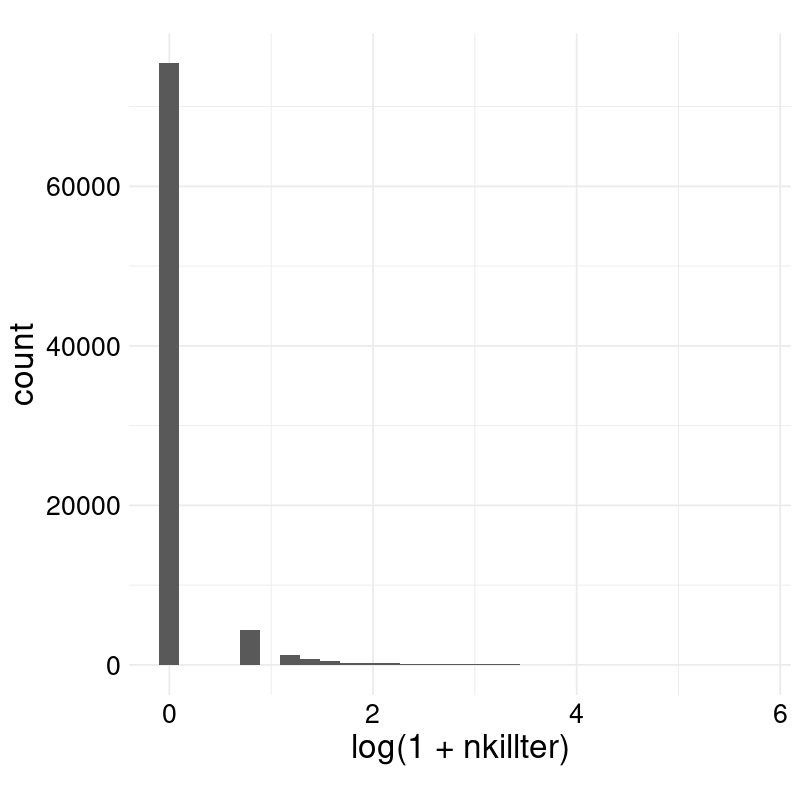

In [42]:
ggplot(data=data, aes(x=log(1 + nkillter))) +
    geom_histogram(bins=30) +
    theme_custom()

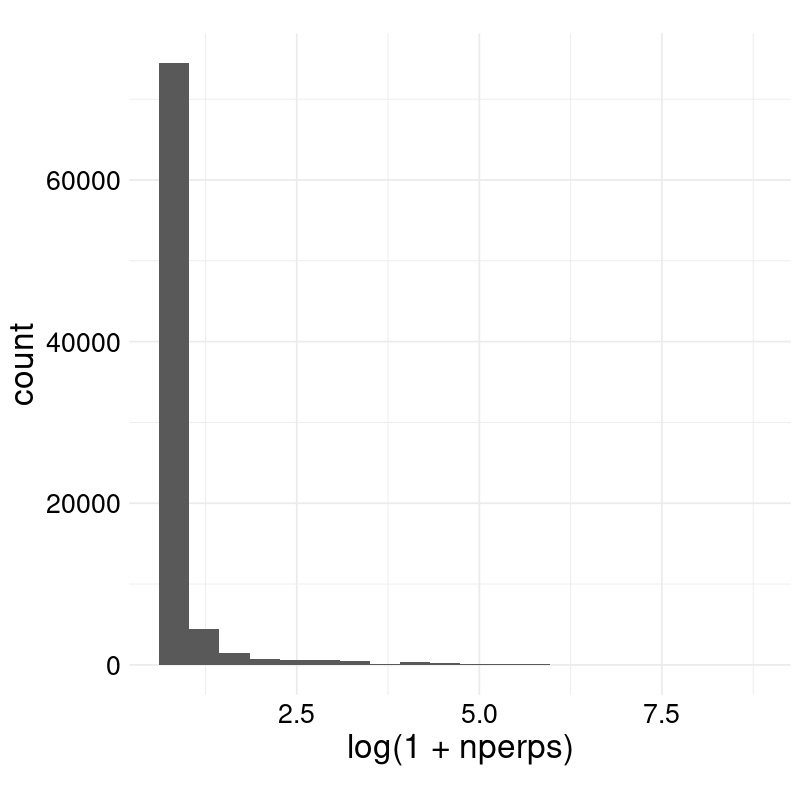

In [43]:
ggplot(data=data, aes(x=log(1 + nperps))) +
    geom_histogram(bins=20) +
    theme_custom()

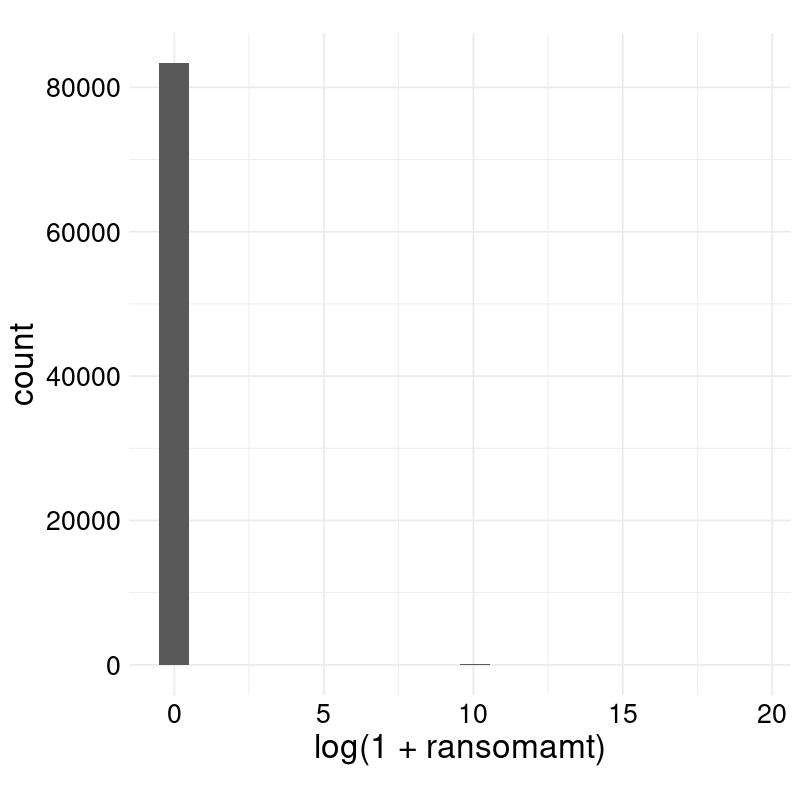

In [44]:
ggplot(data=data, aes(x=log(1 + ransomamt))) +
    geom_histogram(bins=20) +
    theme_custom()

### Correlation

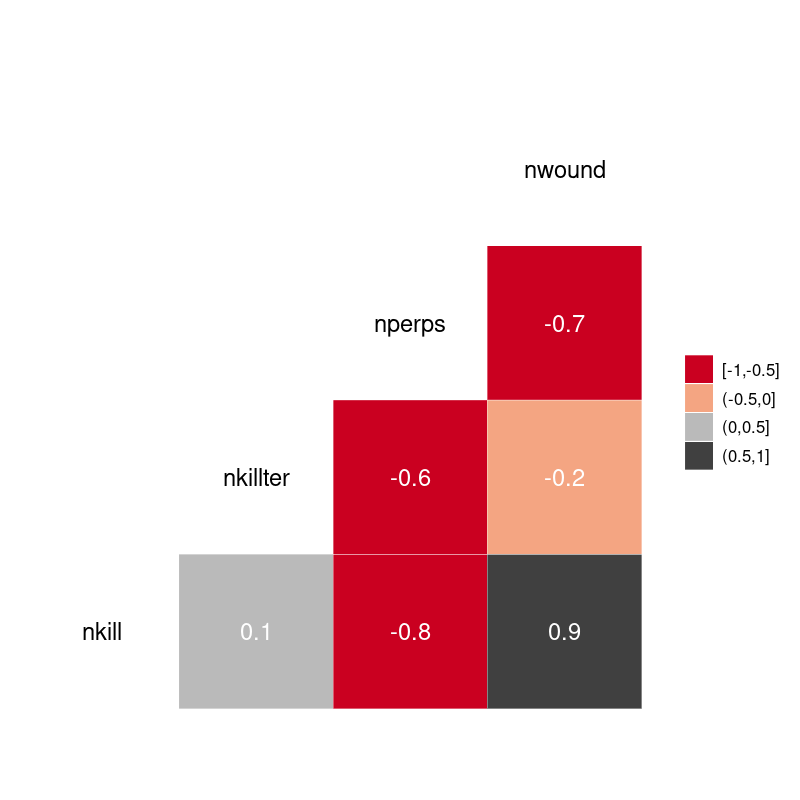

In [45]:
C <- data %>%
    dplyr::select(nkill, nkillter, nperps, nwound) %>%
    dplyr::filter(complete.cases(.)) %>% 
    cor(.)

ggcorr(C, nbreaks=4, label=TRUE, palette="RdGy", 
       size=5, label_color="white", label_size=5, 
       legend.size=10)

## Binary columns

Count values in boolean columns.

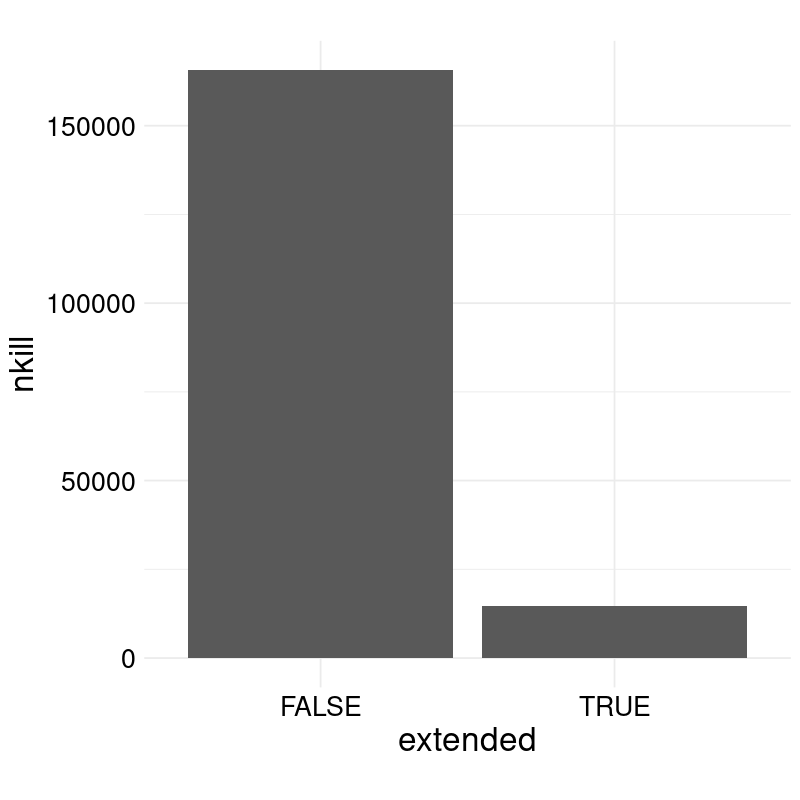

In [46]:
by_extended <- data %>%
    dplyr::select(extended, nkill) %>%
    dplyr::group_by(extended) %>%
    dplyr::summarize(nkill = sum(nkill), .groups="drop")

ggplot(by_extended, aes(x=extended, y=nkill)) +
    geom_bar(stat="identity") +
    theme_custom()

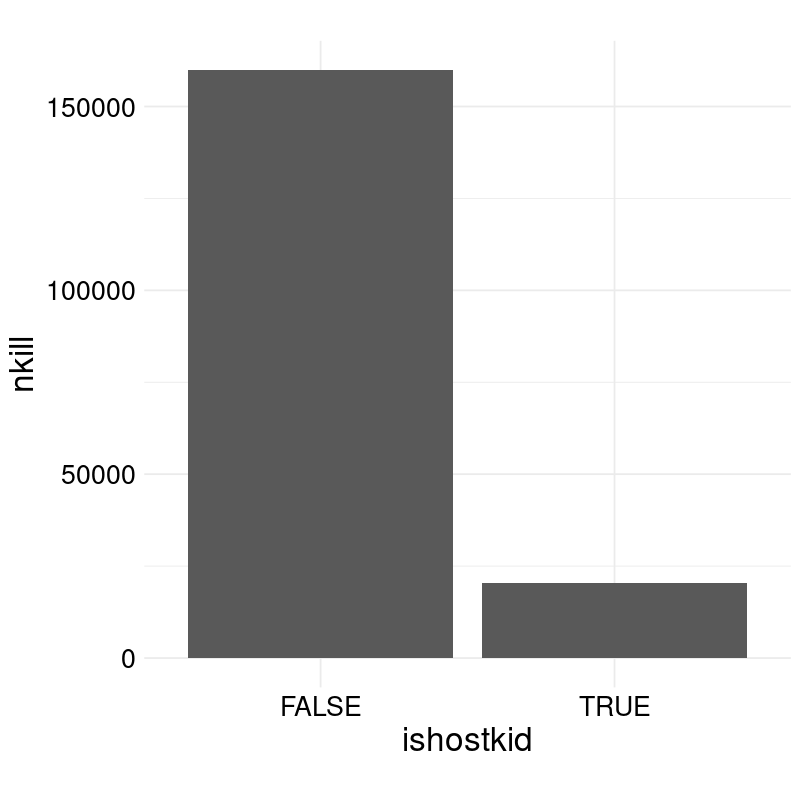

In [47]:
by_ishostkid <- data %>%
    dplyr::select(ishostkid, nkill) %>%
    dplyr::group_by(ishostkid) %>%
    dplyr::summarize(nkill = sum(nkill), .groups="drop")

ggplot(by_ishostkid, aes(x=ishostkid, y=nkill)) +
    geom_bar(stat="identity") +
    theme_custom()

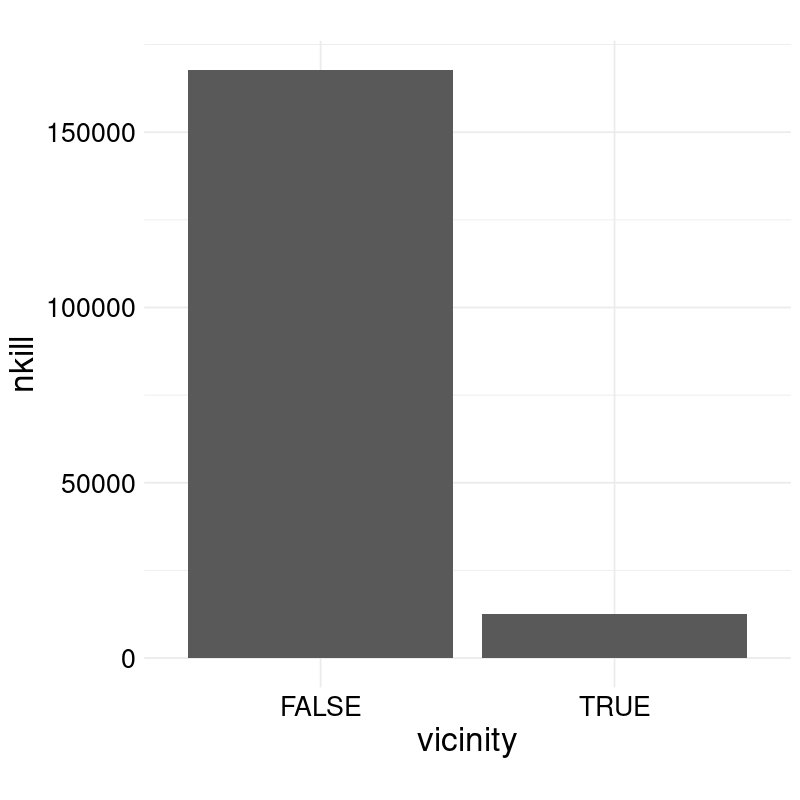

In [48]:
by_vicinity <- data %>%
    dplyr::select(vicinity, nkill) %>%
    dplyr::group_by(vicinity) %>%
    dplyr::summarize(nkill = sum(nkill), .groups="drop")

ggplot(by_vicinity, aes(x=vicinity, y=nkill)) +
    geom_bar(stat="identity") +
    theme_custom()

## Geospatial variables

In [49]:
most_active <- as.character(by_gname$gname)[1:5]

attacks <- data %>%
    dplyr::filter(gname %in% most_active) %>%
    dplyr::select(year, month, day, lat, long, gname, nkill) %>%
    dplyr::filter(!is.na(lat) & !is.na(long))

In [50]:
location <- attacks %>%
    dplyr::group_by(gname) %>%
    dplyr::summarize(lat = mean(lat),
                     long = mean(long), .groups = "drop")

In [51]:
world.map <- rworldmap::getMap()

In [52]:
p <- ggplot() + 
    ggtitle("Attack locations of the 5 most active groups") +
    geom_polygon(data = world.map, aes(x = long, y = lat, group = group), color = "white") +
    coord_fixed(1.3) +
    labs(color='Group') +
    theme(plot.margin=grid::unit(c(1/2,0,1/2,0), "mm"),
          plot.title = element_text(size=20),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),                 
          axis.title.x = element_blank(),
          axis.ticks.x = element_blank(),
          axis.text.x = element_blank(),          
          axis.title.y = element_blank(),
          axis.ticks.y = element_blank(),
          axis.text.y = element_blank(),
          legend.position = "bottom",          
          legend.title = element_text(size = 14),
          legend.text = element_text(size = 14))          

Regions defined for each Polygons



In [53]:
options(repr.plot.width=12, repr.plot.height=12)

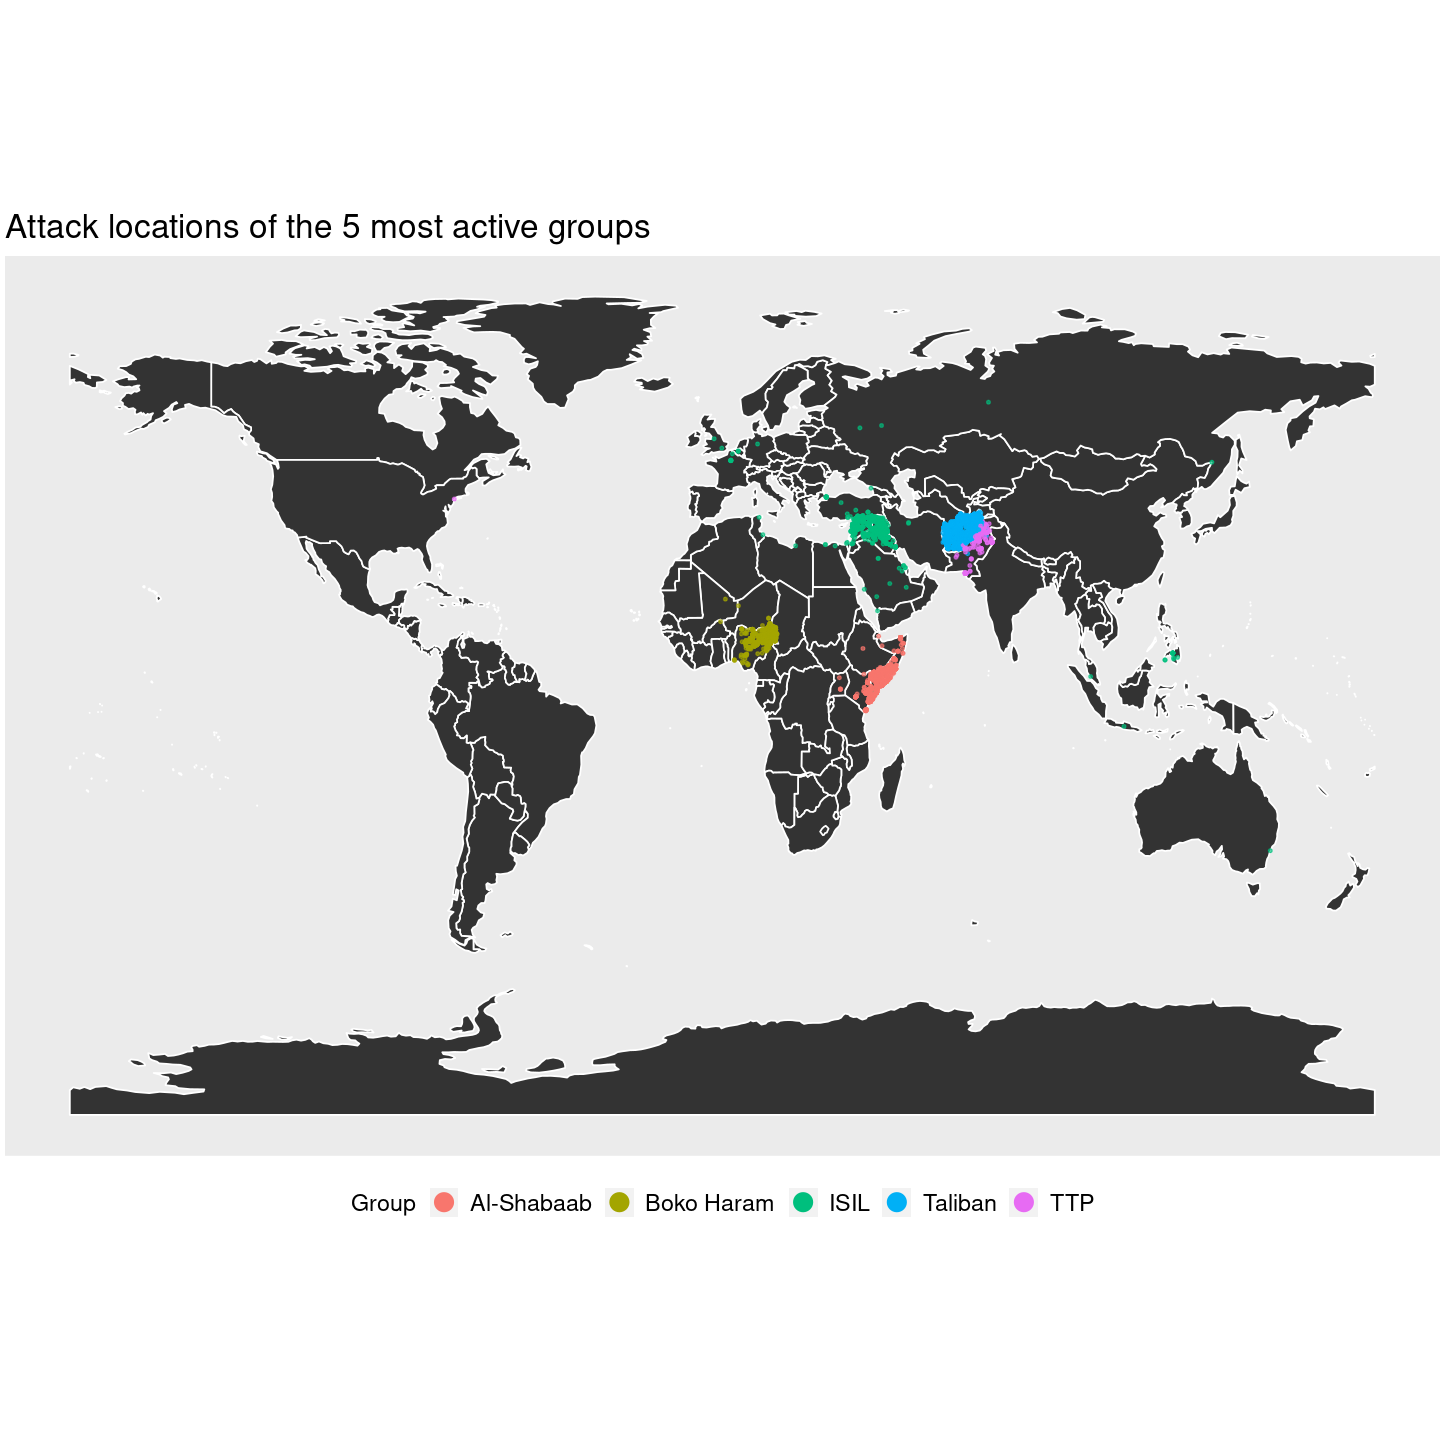

In [54]:
p <- p + 
    geom_point(data = attacks, aes(x = long, y = lat, color = gname), size=3/4, alpha=2/3) +
    guides(colour = guide_legend(override.aes = list(size=5, alpha = 1)))

ggsave("img/group_attack_points.png", p, width=12, height=12)

p

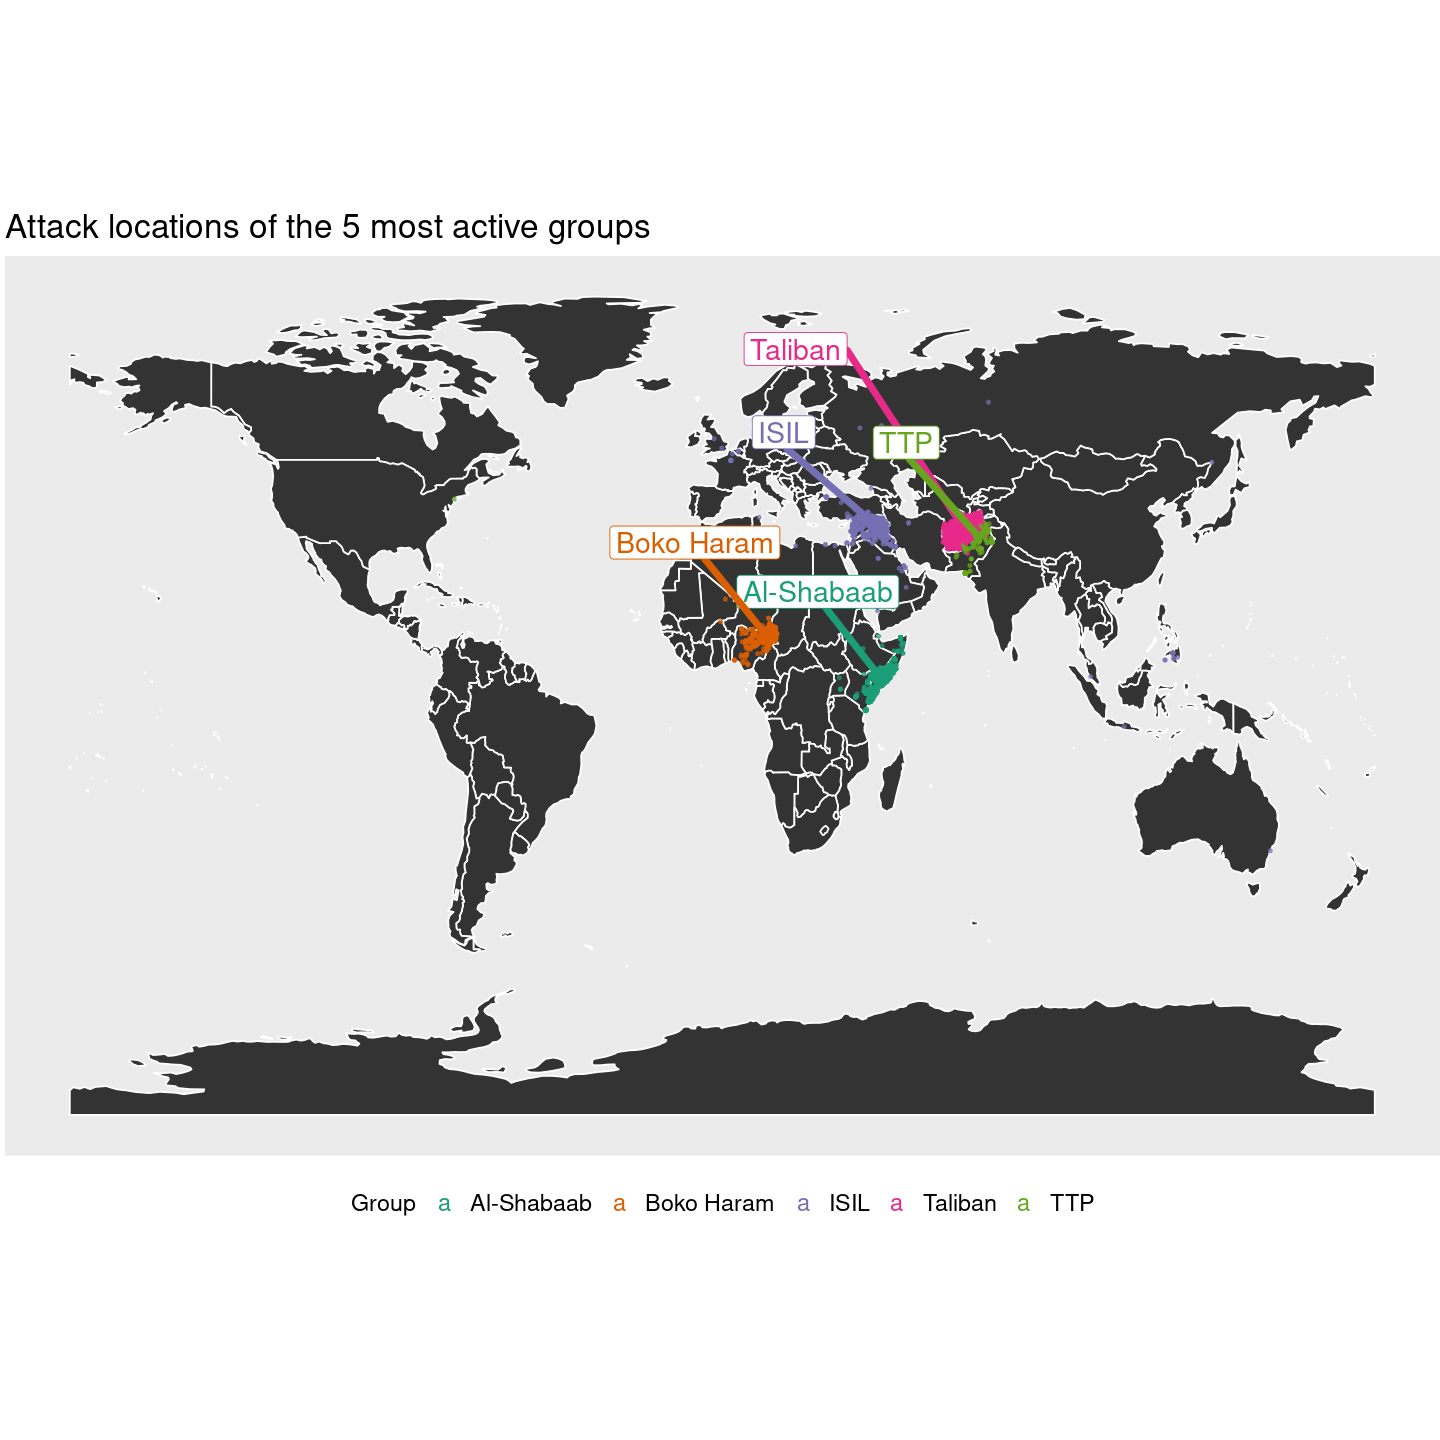

In [55]:
p <- p + 
    geom_label_repel(data = location, aes(x = long, y = lat, label = gname, color = gname), 
                     size=6, segment.size=2, force=20, nudge_y = 20, nudge_x = -20) + 
    scale_color_brewer(palette="Dark2")

ggsave("img/group_attack_annotated.png", p, width=12, height=12)

p

In [56]:
options(repr.plot.width=width, repr.plot.height=height)

# Fancy plot for readme

In [57]:
date <- seq.Date(as.Date('2007-01-01'), as.Date('2017-12-31'), by='month')

date <- dplyr::as_tibble(date) %>% 
        dplyr::rename(date = value)

most_active <- as.character(by_gname$gname)[1:5]

groups <- dplyr::as_tibble(most_active) %>% 
          dplyr::rename(gname = value)

date <- tidyr::crossing(date, groups)

nkill_total <- data %>%
    dplyr::filter(gname %in% most_active) %>%
    dplyr::select(year, month, gname, nkill) %>%
    dplyr::mutate(date = lubridate::make_date(year, month, 1)) %>%
    dplyr::group_by(date) %>%
    dplyr::summarize(nkill.total = sum(nkill), .groups='drop') %>%
    dplyr::right_join(date, by="date")

# nkill_total %>% dplyr::filter(is.na(nkill.total))

nkill_group <- data %>%
    dplyr::filter(gname %in% most_active) %>%
    dplyr::select(year, month, gname, nkill) %>%
    dplyr::mutate(date = lubridate::make_date(year, month, 1)) %>%
    dplyr::group_by(date, gname) %>%
    dplyr::summarize(nkill.group = sum(nkill), .groups='drop')

# nkill_group %>% dplyr::filter(is.na(nkill.group))

nkill_over_time <- dplyr::left_join(x=nkill_total, 
                                    y=nkill_group, 
                                    by=c("date" = "date", "gname" = "gname")) %>%
                   dplyr::mutate(nkill.group = tidyr::replace_na(nkill.group, 0)) %>%
                   dplyr::mutate(pct = nkill.group / nkill.total * 10 ** 4,
                                 pct = as.integer(pct),
                                 pct = round(x = pct / 10 ** 2, digits = 2))

p <- ggplot(data=nkill_over_time, aes(x=date, 
                                      y=pct)) +
    ggtitle('Fatality distribution among the 5 most active groups') +
    geom_area(position = 'stack', aes(fill=gname)) +
    geom_line(aes(group=gname), position="stack", size=1/10, alpha=1/2) +
    ylab('Deaths (%)') +
    ylim(c(0, 100)) +
    labs(fill='Group') +
    scale_fill_brewer(palette="Dark2") +
    guides(color=FALSE) +
    theme_minimal() +
    theme(plot.margin=grid::unit(c(1/2,0,1/2,0), "mm"),
          plot.title = element_text(size=8),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),          
          aspect.ratio = 1/2.75,
          axis.title.x = element_blank(),
          axis.title = element_text(size = 6),
          axis.text = element_text(size = 6),
          legend.position="bottom",          
          legend.title = element_text(size = 6),
          legend.text = element_text(size = 6),
          legend.key.size = unit(1/3,"line"))

ggsave("img/groups.png", p, width=4, height=2, dpi=150)

In [58]:
options(repr.plot.width=12, repr.plot.height=12)

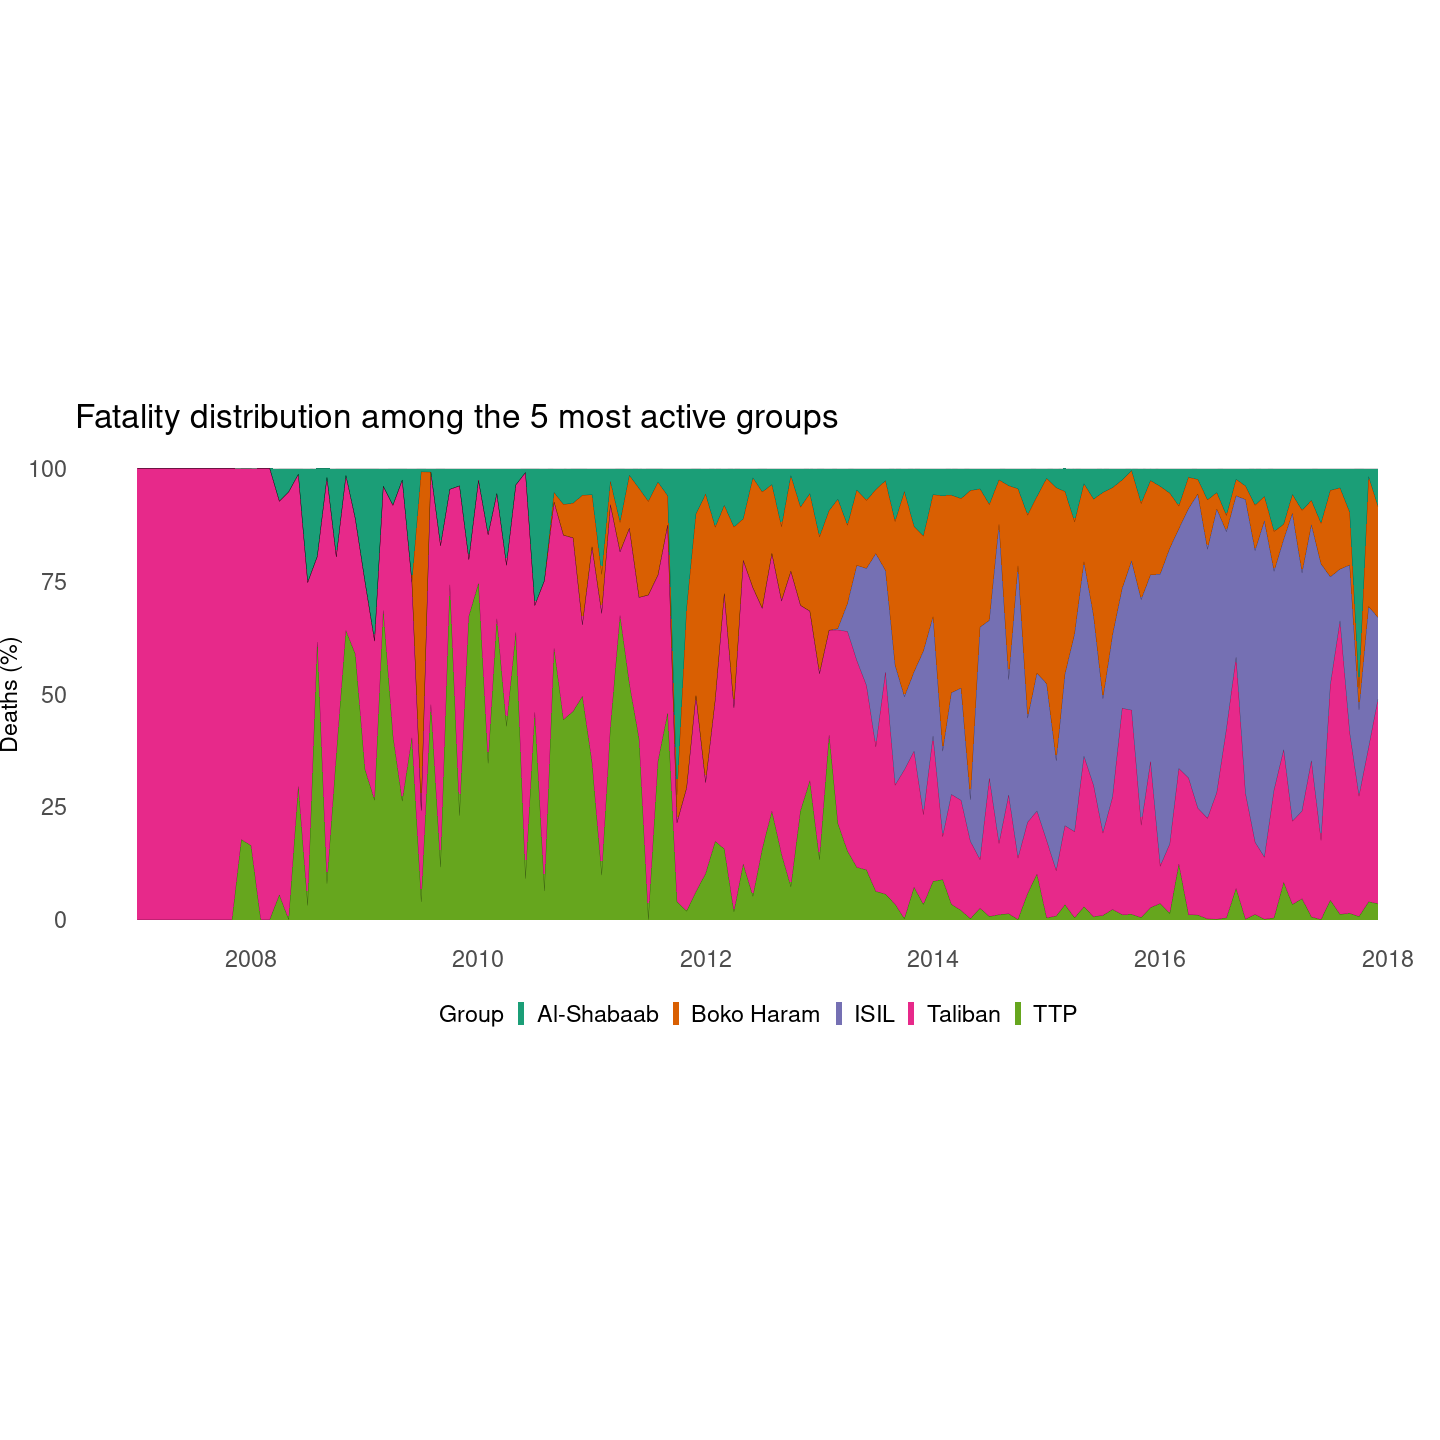

In [59]:
p <- p + 
    theme(plot.margin=grid::unit(c(1/2,0,1/2,0), "mm"),
          plot.title = element_text(size=20),
          legend.position="bottom",       
          axis.title = element_text(size = 14),          
          axis.text = element_text(size = 14),          
          legend.title = element_text(size = 14),
          legend.text = element_text(size = 14),
          legend.key.size = unit(1/3,"line"))

p

In [60]:
options(repr.plot.width=width, repr.plot.height=height)